<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow methiod to determine the best k for Kmeans


<font color = green >

###  Data 

</font>



In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.datasets import make_blobs
%matplotlib inline



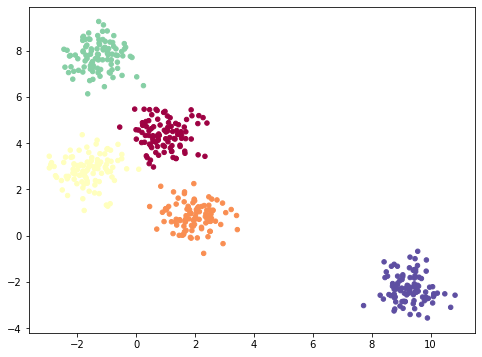

In [3]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

In [5]:
from sklearn.cluster import KMeans

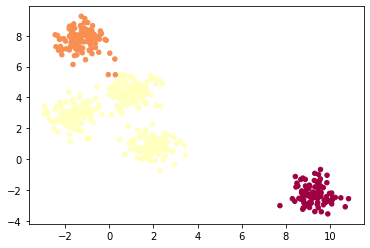

In [50]:
model = KMeans(n_clusters=3)
model.fit(X)

# predicted_label = model.predict([[4, 10]])
# predicted_label

all_predictions = model.predict(X)
# all_predictions

plt.scatter(X[:,0], X[:,1], c= colors[all_predictions], s= 20)

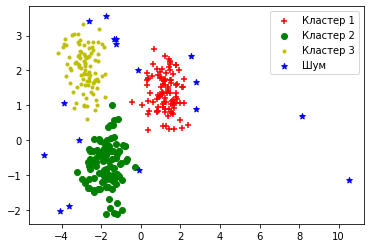

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

dbscan = DBSCAN()
dbscan.fit(X)

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='.')    
    elif dbscan.labels_[i] == -1:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3,c5], ['Кластер 1', 'Кластер 2','Кластер 3','Шум'])
plt.show()

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

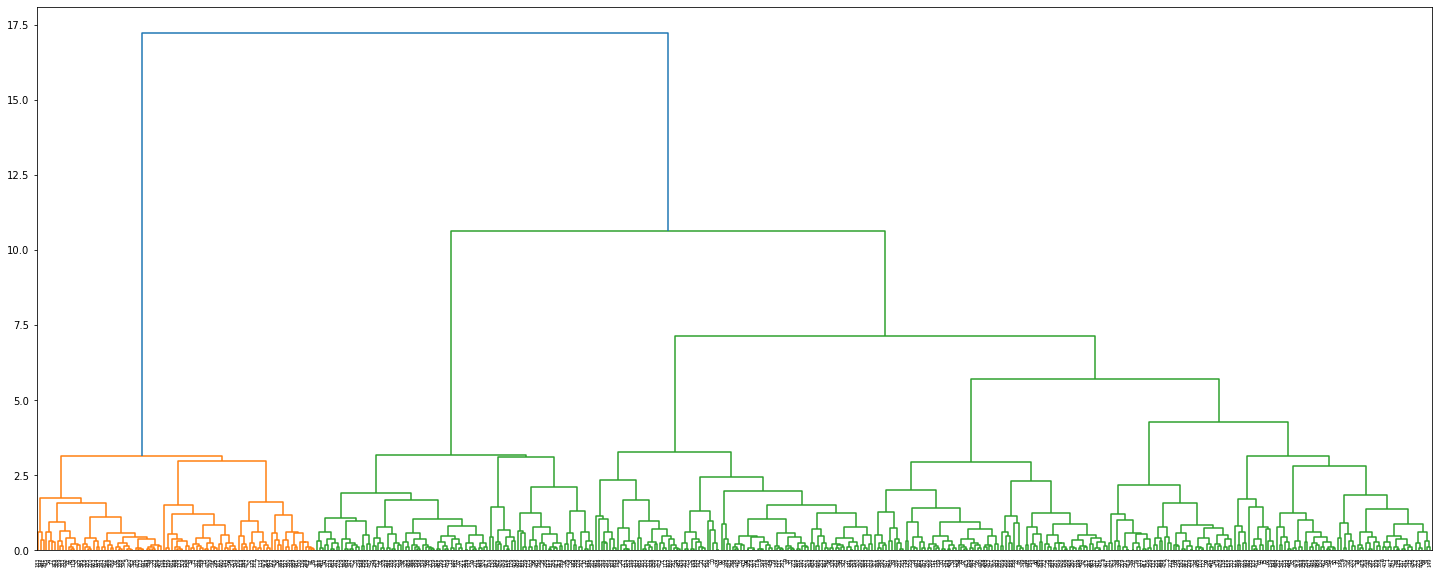

In [39]:

Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

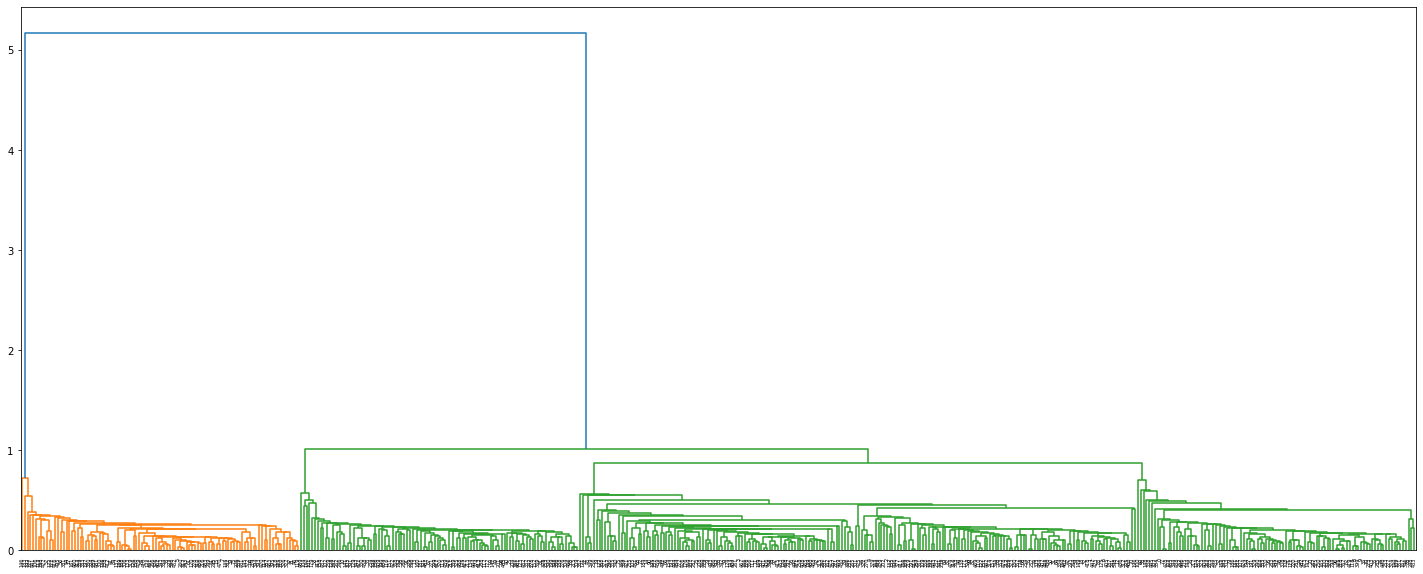

In [47]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()
